In [ ]:
---
format: 
  html:
    code-fold: true
    embed-resources: true
    css: https://tehrandav.is/a_to_z_project/css/project_pages.css
---

<header class="page_header">
  <a href="https://tehrandav.is" class="logo" style = "text-decoration: none !important; font-size: 2rem !important;"><span>tehran</span>dav.is: the A to Z project<span class="animate" style="--i:1;"></span></a>
</header>

# A is for Auto-Recurrence

[![tehrandavis/auto_rqa - GitHub](https://gh-card.dev/repos/tehrandavis/auto_rqa.svg?fullname=)](https://github.com/tehrandavis/auto_rqa)




Recurrence Quantification Analysis (RQA) is a sophisticated technique used to analyze time series data. It's especially useful when the data under investigation is non-stationary or non-linear. RQA is derived from recurrence plots (RP), which are graphical representations that demonstrate the times at which a phase space trajectory visits roughly the same area in the phase space. Auto-recurrence analysis is simply like playing a game of spot-the-pattern with a single string of data, matching it against itself to find repeating sequences or trends. It's one of several related techniques, with its siblings, cross-recurrence and joint recurrence, exploring relationships between different data sets, while auto-recurrence focuses purely on understanding the inner workings of one.

Here's a simplified breakdown of how RQA works:

### Recurrence Plots (RP)
1. **Phase Space Reconstruction**: Transform the time series data into a multidimensional phase space to represent the dynamical structure of the system.
2. **Recurrence Plot Creation**: Create a 2D square plot where each point represents a time when the state of a dynamic system recurs. Specifically, it illustrates when the states at two different times (\(i, j\)) are close (using a predefined distance metric and threshold).

### Recurrence Quantification Analysis (RQA)
After obtaining the recurrence plot, RQA quantifies the structures in it by considering several measures. A good place to look is [here](https://juliadynamics.github.io/RecurrenceAnalysis.jl/stable/quantification/#RQA-Measures). In this project, we will be showing examples with the following measures:

- **Recurrence Rate (RR)**: The proportion of recurring points in the recurrence plot.
- **Determinism (DET)**: The percentage of recurrence points that form diagonal lines, indicative of deterministic processes in the system.
- **Entropy (ENTR)**: The entropy of the line length distributions, providing insights into the complexity of the system dynamics.

### Applications
RQA has diverse applications across various disciplines, such as:

- **Biomedical Sciences**: Analyzing heart rate, gait dynamics, etc.
- **Finance**: Investigating stock market dynamics.
- **Climate Science**: Examining weather pattern shifts.
- **Engineering**: Analyzing signal fluctuations in machinery for preventive maintenance.

### Advantages and Limitations

- **Advantages**: Capable of analyzing non-stationary, non-linear, and noisy data; doesn't require large datasets.
- **Limitations**: The choice of parameters (embedding dimension, delay, distance threshold) can influence the results and can be somewhat arbitrary.

## Project: Exploring Song Lyrics with Auto-Recurrence Quantification Analysis

We're taking a fresh approach to analyzing song lyrics by using auto-recurrence quantification analysis (aRQA) to detect patterns and underlying rhythms.

This project aims to explore the intricacies of song lyrics through the lens of Recurrence Quantification Analysis (RQA). At the intersection of music and mathematics, we can use this tool to decipher patterns, structures, and complexities hidden within the poetic expressions of song lyrics.

Exploring song lyrics offers a valuable perspective for RQA exploration. Many of us instinctively recognize patterns in songs, especially when we find ourselves singing along to a catchy chorus. By tapping into this inherent sense of musical structure, we can better appreciate and anticipate the findings RQA brings to the table. Essentially, using the familiar realm of music helps demystify the more technical aspects of RQA.

**Recurrence Rate in Song Lyrics**

The recurrence rate (RR) is like our song's repeatability score. If a song keeps circling back to the same phrases or words (think of catchy choruses), it will have a high score. On the other hand, if the lyrics are varied and don't often repeat, the score will be lower.

**Line Measures Speak to Sequences of Words**

When any two or more recurring points are adjacent to each other, they form a line. In the recurrence plot, these lines are represented by diagonal lines. In auto RQA, we can define the minimum length of a line to be considered. Usually, this number is set at 2, meaning that a line must have at least 2 points to be considered, but we can also set it to 3, 4, or more depending on what we are interested in. In the context of song lyrics, line measures identify the patterns of words and phrases in the lyrics. If a song has a lot of diagonal lines in the RP, it will have a high determinism score (DET). But if the lyrics feel more free-flowing, without a clear repeating pattern, that indicates low determinism. Another useful measure to obtain might be the mean line length (L). This measure is the average length of all the lines in the recurrence plot. It can be used to understand the average length of the patterns in the lyrics. If the mean line length is high, it means that the lyrics have long patterns that repeat. If the mean line length is low, it means that the lyrics have short patterns that repeat.

**Entropy Measures Assess the Complexity of Patterns**

Entropy helps us understand the variety in a song's lyrical patterns. If there's a lot of unpredictability in the way words or phrases come back around, that song has high entropy—it keeps you on your toes. But if the song often revisits themes or lines in a more predictable fashion, it has lower entropy, suggesting a more structured, repeated rhythm to the words. There are two measures that **DynamicalSystems.jl** generates based on the RP that are quite useful here. The first is ENTR, which is the Shannon entropy of the histogram of the line lengths. This is essentially a measure of the variability of line lengths that we see in the RP. Low ENTR might suggest that many of the lines of repeated words are of the same length. High ENTR might suggest that the lines of repeated words are of varying lengths. The second measure is RTE, which is the entropy of Recurrence Times. What is a "recurrence time"? It is the time between two consecutive recurrences of a point. For example, if a point recurs at time 10 and then again at time 20, the recurrence time is 10. RTE is the entropy of the histogram of recurrence times. This is essentially a measure of the variability of the recurrence times that we see in the RP. Low RTE might suggest that many of the recurrence times are the same. High RTE might suggest that the recurrence times are of varying lengths. We'll unpack these in a little more detail in an example below (including potential pitfalls).

### Tools

For this project, we are going to be using [**Julia**](https://julialang.org/). Although **R** and **Python** have wonderful RQA tools, I find the [**Dynamical Systems Toolbox**](https://juliadynamics.github.io/DynamicalSystems.jl/v1.3/) in Julia to be the most powerful. It's also pretty easy to use and has great documentation.

To start let's load in the packages we will need for this project.

In [1]:
# Importing necessary packages
using CSV, # For reading CSV files
    DataFrames, # For working with data in tabular format
    Random, # For generating random numbers
    PrettyTables, # For printing tables
    TextAnalysis, # For text preprocessing
    Statistics, # For statistical analysis
    PyPlot, # For plotting
    Tidier, # For data wrangling
    StatsBase # For statistical functions


[ Info: Precompiling CSV [336ed68f-0bac-5ca0-87d4-7b16caf5d00b]
[ Info: Precompiling DataFrames [a93c6f00-e57d-5684-b7b6-d8193f3e46c0]


LoadError: ArgumentError: Package Tidier not found in current path.
- Run `import Pkg; Pkg.add("Tidier")` to install the Tidier package.

And now the songs. The `playlist_lyrics.csv` file (see linked Github Repo) contains the information, including artist, title, genre and lyrics of six songs that I extracted from [this dataset on Kaggle]("https://www.kaggle.com/datasets/carlosgdcj/genius-song-lyrics-with-language-information")

In [15]:
song_lyrics_df = CSV.read("../data/playlist_lyrics.csv", DataFrame);
show(song_lyrics_df, allcols=true, allrows=true, nosubheader=true)

8×3 DataFrame
 Row │ artist              title                          lyrics                            
─────┼──────────────────────────────────────────────────────────────────────────────────────
   1 │ Gnarls Barkley      Crazy                          [Verse 1]\nI remember when\nI re…
   2 │ Simon & Garfunkel   The Boxer                      [Verse 1]\nI am just a poor boy,…
   3 │ Rihanna             Desperado                      [Verse 1]\nDesperado\nSittin' in…
   4 │ The Beatles         Hey Jude                       [Verse 1: Paul McCartney]\nHey J…
   5 │ Harry Styles        Golden                         [Intro]\nHey!\n\n[Verse 1]\nGold…
   6 │ Drake               5 AM in Toronto                [Intro]\nYeah\nThis on some old …
   7 │ Neutral Milk Hotel  In the Aeroplane Over the Sea  [Verse 1]\nWhat a beautiful face…
   8 │ Daft Punk           Around the World               [Refrain]\nAround the world, aro…

As with most text scraped from the web, we need to do a little cleaning of the lyrics. I've written a quick and dirty function to do this (emphasis on quick and dirty—I'd recommend being more deligent with real data), which you can find below. It includes things like removing punctuation, making everything lowercase, and removing words that aren't lyrics (like "John Lennon").

In [16]:
function lyrics_cleaner(lyrics)
    sd = StringDocument(lyrics)
    TextAnalysis.remove_words!(sd, ["Verse",
                                    "Refrain",
                                    "Pre-Chorus",
                                    "Chorus",
                                    "Bridge",
                                    "Outro",
                                    "Paul McCartney", "John Lennon", "George Harrison"])
    TextAnalysis.prepare!(sd, strip_non_letters | strip_punctuation | strip_case)
    output = TextAnalysis.text(sd)
    output = replace(output, "\n" => " ")
    output = replace(output, "  " => " ")
    return output
end;


Finally, to prep the data for aRQA we need to convert every word into a unique interger. In the code below I'm getting the info from each song, cleaning the lyrics, and then converting the lyrics into a list of integers. I'm saving all of this information in a dictionary called `track_info`.

In [18]:
# create an empty Dict to store the artist info
track_info = Dict();

# loop through each row of the DataFrame
for row in eachrow(song_lyrics_df)
    # get the artist name, original lyrics, and cleaned lyrics
    artist = row.artist
    song = row.title
    lyrics = row.lyrics
    cleaned_lyrics = lyrics_cleaner(lyrics)
    
    # convert the cleaned lyrics to word numbers using the word_dict
    words = split(cleaned_lyrics)
    
    
    # create word_dictionary:
    unique_words = unique(words)
    word_dict = Dict(unique_words .=> 1:length(unique_words))
    #word_num_list = Any[]

    word_num_list = [word_dict[word] for word in words]
    
    # add the artist info to the Dict
    track_info[song] = Dict("artist" => artist,
                            "lyrics" => lyrics,
                            "cleaned_lyrics" => cleaned_lyrics,
                            "word_series" => word_num_list)
end;

Here is an example of the original lyrics:

In [19]:
track_info["Desperado"]["lyrics"]

"[Verse 1]\nDesperado\nSittin' in an old Monte Carlo\nA man whose heart is hollow\nMhm, take it easy\nI'm not tryna go against yuh\nActually, I'm goin' witcha\n\n[Pre-Chorus]\nGotta get up out of here\nAnd yuh ain't leavin' me behind\nI know you won't cause we share common interest" ⋯ 1071 bytes ⋯ "t, we can be runaways\nRunning from any sight of love\nYeah, yeah, there ain’t nothin'\nThere ain't nothin' here for me\nThere ain't nothin' here for me anymore\nBut I don't wanna be alone\n\n[Outro]\nYeah-yeah-ah\nYeah-yeah-ah\nYeah-yeah-ah\nYeah-yeah-ah\nYeah-yeah-ah\nYeah-yeah-ah"

The cleaned lyrics:

In [6]:
track_info["Desperado"]["cleaned_lyrics"]

" desperado sittin in an old monte carlo a man whose heart is hollow mhm take it easy im not tryna go against yuh actually im goin witcha  gotta get up out of here and yuh aint leavin me behind i know you wont cause we share common interests you need me there aint no leav" ⋯ 894 bytes ⋯ "dont wanna be alone if you want we can be runaways running from any sight of love yeah yeah there aint nothin there aint nothin here for me there aint nothin here for me anymore but i dont wanna be alone  yeahyeahah yeahyeahah yeahyeahah yeahyeahah yeahyeahah yeahyeahah"

And the lyrics converted to integers:

In [7]:
track_info["Desperado"]["word_series"] |> transpose

1×282 transpose(::Vector{Int64}) with eltype Int64:
 1  2  3  4  5  6  7  8  9  10  11  12  …  74  62  75  92  92  92  92  92  92

### aRQA Considerations

One of the more challenging aspects of RQA is the choice of parameters. Phase space reconstruction requires us to select an appropriate embedding dimension and delay. Recurrent points are defined as those that fall within a chosen distance threshold, meaning we pick a maximum allowable distance, and when points in our reconstructed phase space are that close (or closer), we consider them recurrent or repeating.

Fortunately, our lyrics example spares us some of this difficulty. When dealing with categorical data (like words), we typically use the raw series as is without phase space reconstruction. This means we don't have to worry about the embedding dimension or delay. However, we still need to select a distance threshold. For the purposes of this project, we will use a distance threshold that demands exact matches. This means that we will only consider words that are identical as recurrent. However, this doesn't mean there isn't room to get creative. For example, we could use a distance threshold that allows for a certain number of phonetic differences or even semantic differences and relationships. The possibilities are endless.

Before continuing, I just want to take a quick aside to look at the impact of the radius parameter. A radius parameter that is too low risks missing important patterns, while a radius parameter that is too high risks overfitting and missing the forest for the trees. For example, let's take a look at the RP of this steady repeating signal, assuming a radius of 0, 0.5, and 1.5.

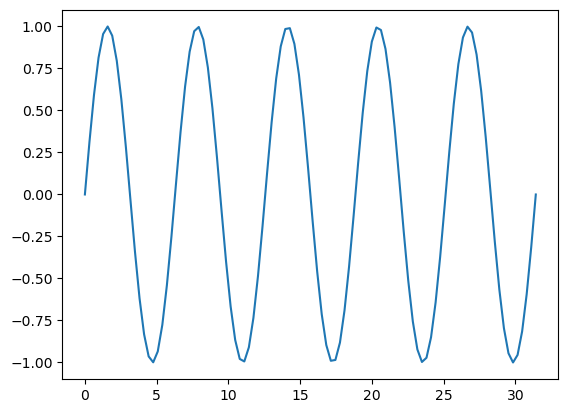

In [8]:
using LinearAlgebra

# create a sequence of integers from 1 to 100
x = LinRange(0, 10π, 100) 

# create a sequence that approximates a sine wave
y = sin.(x)

# plot the sine wave
plot(x, y);


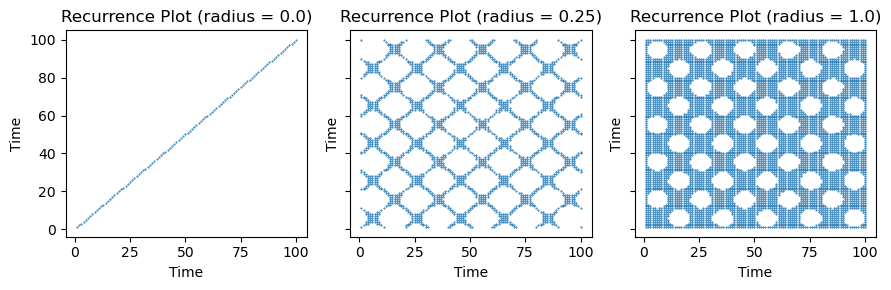

In [9]:
using PyPlot
using DynamicalSystems

# create a sequence of radii to iterate over
radii = [0, .25, 1];

# create a new figure with subplots of equal size
fig, axs = subplots(1, 3, figsize=(9, 3), sharey=true);

# iterate over the radii and create a new plot for each one
for (i, radius) in enumerate(radii)
    # create a recurrence plot with the current radius
    RP = RecurrenceMatrix(y, radius)
    xs, ys = coordinates(RP)
    
    # create a square image of the recurrence plot
    #axs[i].imshow(RP, cmap="gray", aspect="equal")
    
    axs[i].scatter(xs, ys, marker=".", s = 1)
    
    # set the plot title and axis labels
    axs[i].set_title("Recurrence Plot (radius = $radius)")
    axs[i].set_xlabel("Time")
    axs[i].set_ylabel("Time")
end

# adjust the layout of the subplots and display the figure
tight_layout();

As illustrated in the plots above, the recurrence plot with a radius of 0 appears notably sparse. It primarily displays a single line along the diagonal—termed the "line of incidence." This results from every point being recurrent with itself, thus representing the original signal without any repeating patterns. For auto-recurrence, this line of incidence also serves as the line of identity, rendering the plot symmetrical around it. As the radius parameter is increased, the density of recurrent points grows, denoting instances where the signal replicates within a defined tolerance (radius).

But what qualifies as "too dense"? While it varies based on the data and the specific questions at hand, a general rule of thumb is for recurrent points to comprise about 5-10% of the recurrence plot. Though this serves as a useful benchmark, remember it's a heuristic. To truly ascertain the optimal radius, experimentation with diverse values to observe resulting variations is key.

Regarding the subsequent musical example, envision the line of incidence as the song's lyrics progressing from the start (bottom left) to the end (top right), devoid of repeating patterns. To visualize the repetition within the lyrics, the radius parameter needs to be increased. However, over-increasing it could lead to overfitting, potentially obscuring broader insights. In this instance, maintaining a radius of 0.01 ensures that repeating patterns for each unique word are captured. Note that given our words are assigned integer values, any radius less than 1 will suffice.

### Looking at the lyrics data

Here is the resulting recurrence plot for the song "Desperado" by Rihanna. This song has a clear repetitive structure, starting with the chorus introducing the "Desperado," which then repeats three more times between the two verses and two pre-choruses. The pre-chorus sections stay exactly the same each time: "Gotta get up out of here, and You ain't leaving me behind. I know you won't, 'cause we share common interests," and the two verses open in a similar way, both starting with "Desperado sitting in an old Monte Carlo." Phrases like "I don't wanna be alone" are repeated multiple times, in the choruses and bridge. The repetition of the chorus lyrics, identical pre-choruses, similar verse openings, and phrases like "I don't wanna be alone" create a predictable structure that emphasizes the song's themes.

<html><iframe style="border-radius:12px" src="https://open.spotify.com/embed/track/4mCf3vQf7z0Yseo0RxAi3V?utm_source=generator&theme=0" width="100%" height="80" frameBorder="0" allowfullscreen="" allow="autoplay; clipboard-write; encrypted-media; fullscreen; picture-in-picture"></iframe></html>

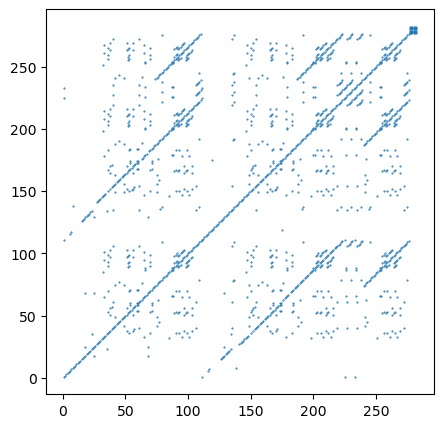

In [10]:
using DynamicalSystems

lyrics_series = track_info["Desperado"]["word_series"];

radius = .01;

RP = RecurrenceMatrix(lyrics_series, radius);

fig, axs = subplots(1, 1, figsize=(5, 5));

# recurrence plot
xs, ys = coordinates(RP);
axs.scatter(xs, ys, s = 1, marker=".");

Looking at the plot above, you'll notice that prominent diagonal lines appear, indicating that the lyrics of the song repeat themselves. The most prominent captures the sequence of lyrics starting in the second verse that largely mirror the opening sequence. This occurs approximately at index 100. The small gaps in this line are moments when the lyrics diverge.

Let's take a look at "Hey Jude" by the The Beatles. Those familiar with this song will recognize the repetitive structure of the chorus, which repeats the phrase "Hey Jude" multiple times. The verses also have a similar structure, with the first verse opening with "Hey Jude, don't make it bad" and the second verse opening with "Hey Jude, don't be afraid." The bridge is also repetitive, with the phrase "The minute you let her under your skin" repeated multiple times. The chorus is repeated multiple times, and the song ends with a long sequence of "na na na na na na na na" that is repeated over and over.

Here's the plot.

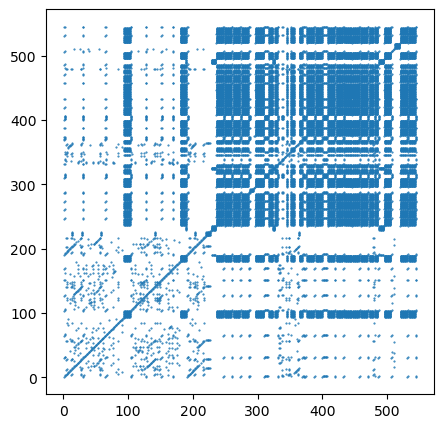

In [11]:
using DynamicalSystems

lyrics_series = track_info["Hey Jude"]["word_series"];

radius = .01;

RP = RecurrenceMatrix(lyrics_series, radius);

fig, axs = subplots(1, 1, figsize=(5, 5));

# recurrence plot
xs, ys = coordinates(RP);
axs.scatter(xs, ys, s = 1, marker=".");


We can clearly see the structure of the sequences of repetition. That grid-looking thing in the upper right... there are your "na na na na na na na's."

Next, let's take a look at "5 AM in Toronto" by Drake. This rap song is distinct from our other songs given it doesn't have a chorus. Instead Drake's lyrics flow for the length of the track. 

Given the plot, what might we say about the relative structure and pattern of the corresponding lyrics?

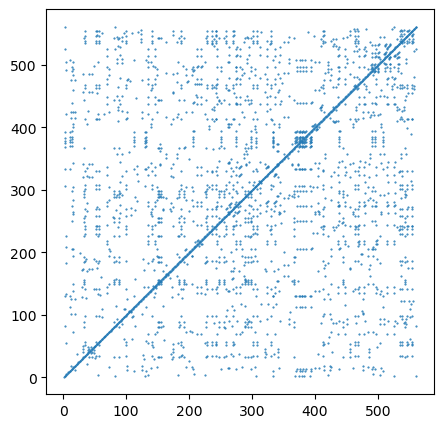

In [12]:
using DynamicalSystems

lyrics_series = track_info["5 AM in Toronto"]["word_series"];

radius = .01;

RP = RecurrenceMatrix(lyrics_series, radius);

fig, axs = subplots(1, 1, figsize=(5, 5));

# recurrence plot
xs, ys = coordinates(RP);
axs.scatter(xs, ys, s = 1, marker=".");


Finally, let's look at "Around the World" by Daft Punk. This song is a great example of a song with a extremely repetitive structure. The lyrics are simple and repeating, with the phrase "around the world" sung over and over and over. Let's create a plot and see what we can learn.

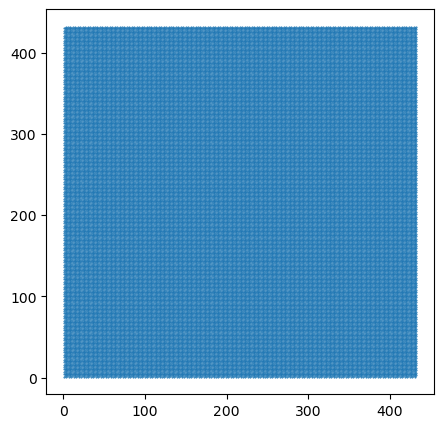

In [174]:
using DynamicalSystems

lyrics_series = track_info["Around the World"]["word_series"];

radius = .01;

RP = RecurrenceMatrix(lyrics_series, radius);

fig, axs = subplots(1, 1, figsize=(5, 5));

# recurrence plot
xs, ys = coordinates(RP);
axs.scatter(xs, ys, s = 1, marker=".");


Honestly, at a macro level, there may not be much to learn from this plot. The song is super repetitive—it simply repeats the phrase "Around the World" over and over again throughout its duration. Because of this, the plot is packed with recurrent points. Let's zoom in on a small section of the plot to see if we can learn anything. Because the song is so repetitive, we can zoom in on any section and see the same thing. Let's zoom in on the first 25% of the song.

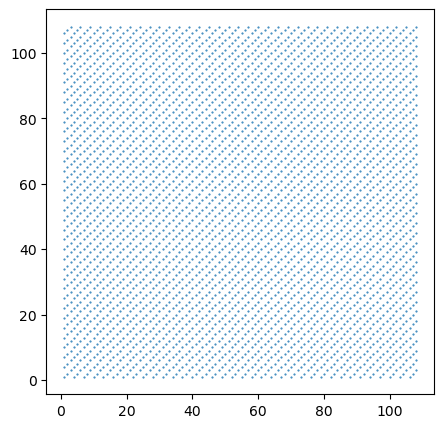

In [200]:
lyrics_series = track_info["Around the World"]["word_series"];

radius = .01;

RP = RecurrenceMatrix(lyrics_series[1:108], radius);

fig, axs = subplots(1, 1, figsize=(5, 5));

xs, ys = coordinates(RP);

axs.scatter(xs, ys, s = 1, marker=".");

Zooming in we see a bunch of striated diagonal lines. From this, two things become clear. First, the the diagaonal line sequences run the length of the plot. Second the gaps between the diagonals are evenly spaced. This has two important consequences for quantitative analyses later on, and, in this case may indicate a need for caution when interpreting aRQA metrics realted to entropy. More on that in a bit.

## Comparing and interpreting RQA Measures

Let's take a look at what we get when we get various aRQA measures for the first three songs, "Desperado", "Hey Jude", and "5 AM in Toronto".

In [28]:
playlist = ["Desperado", "Hey Jude", "5 AM in Toronto"]

playlist_rqa = DataFrame(title=[], word_length = [], RR=[], DET=[], L = [], ENTR=[])

for song in playlist
    lyrics = track_info[song]["word_series"]
    RP = RecurrenceMatrix(lyrics, .01)
    rqa_metrics = rqa(RP; lmin = 2, thieller = 1) # exclude LOI
    new_row = DataFrame(title = song, word_length = size(lyrics)[1], RR = rqa_metrics[:RR], DET = rqa_metrics[:DET], L = rqa_metrics[:L], ENTR = rqa_metrics[:ENTR])
    append!(playlist_rqa, new_row)
end

pretty_table(playlist_rqa, show_subheader=false, backend=Val(:html))


title,word_length,RR,DET,L,ENTR
Desperado,282,0.0166074,0.589089,5.25676,1.65695
Hey Jude,545,0.154297,0.9324,5.07868,2.17568
5 AM in Toronto,561,0.0074548,0.134687,2.28986,0.645297


In [ ]:
# create a figure with three subplots
fig, axs = subplots(1, 3, figsize=(12, 4));

# plot the mean values for RR in the first subplot
axs[1].bar(playlist_rqa.title, playlist_rqa.RR);
axs[1].set_title("RR");

# plot the mean values for DET in the second subplot
axs[2].bar(playlist_rqa.title, playlist_rqa.DET);
axs[2].set_title("DET");

# plot the mean values for ENTR in the third subplot
axs[3].bar(playlist_rqa.title, playlist_rqa.ENTR);
axs[3].set_title("ENTR");



# set the plot title and axis labels
fig.suptitle("RQA Metrics by Song", fontsize=14, fontweight="bold");
fig.text(0.04, 0.5, "Value", va="center", rotation="vertical");

# display the plot
display()

Looking at the resulting measures, it's pretty apparent that aRQA provides very different measures for RR, DET, L, and ENTR for each song. Let's unpack this a bit:

- As we might expect, "Hey Jude" has by far the highest recurrence rate (RR), suggesting that it has the most repeating lyrics. This is consistent with our observations of the song's structure and most likely inflated by the long sequence of "na na na na na na na na" at the end of the song. "5 AM in Toronto" has the least, again consistent with what we know from the Recurrence Plot and the structure of repeating lyrics (or lack thereof) in the song.
- Turning our attention to DET, we see again that "Hey Jude" has the highest score. Whereas RR simply asks if a given word repeats, DET captures the percentage of repeating words that form repeating sequences. Think of it as saying "okay, I've found a repeating word, now is it part of a sequence?" For example, in this simple sentence "Easy come, easy go," the word "easy" repeats twice, but in either case, it's followed by a different word. Contrast this to "The harder they come, the harder they fall," where "the" not only repeats twice, and in both cases, it's followed by the words "harder" and "they," forming a three-word sequence. This three-word sequence would be visualized by a diagonal line on the Recurrence plot and would be captured by DET. This is why "Hey Jude" has a high DET score because it has many repeating sequences. "5 AM in Toronto" has the lowest DET score, again consistent with the lack of repeating sequences in the song.
- Continuing our focus with line sequences, we also see that "5 AM in Toronto" has the shortest mean line length (L). Whereas DET told us that this song has very few repeating sequences, L tells us that the ones that do repeat are very short. On average, a repeating sequence in "5 AM in Toronto" was just over two words (e.g., "I ain't," "A couple," "anything happen"), whereas for both "Hey Jude" and "Desperado," repeating sequences tended to last on average 5 words (though to be fair, "Hey Jude" is likely inflated here due to those 'na-na-na-na-na-na-na-nas').
- Next, let's consider entropy (ENTR). ENTR captures the complexity of lengths of the repeating sequences in the RP. For example, if all of the repeating sequences are exactly 3 words in length, then the ENTR would be very low. If, however, there was great variation in the length of the sequences (e.g., some 2, some 3, 4, 5, 10 words long), then ENTR would be greater. Between these three songs, "5 AM in Toronto" has the lowest ENTR, likely due to the fact that most of the repeating sequences are very short with little variation. In contrast, both "Desperado" and "Hey Jude" have higher ENTR, suggesting that the repeating sequences are more varied in length.

So far so good. But what about "Around the World"? Let's add its output to our results:



In [40]:
playlist = ["Desperado", "Hey Jude", "5 AM in Toronto", "Around the World"]

playlist_rqa = DataFrame(title=[], word_length = [], RR=[], DET=[], L = [], ENTR=[], MRT = [], RTE=[])

for song in playlist
    lyrics = track_info[song]["word_series"]
    RP = RecurrenceMatrix(lyrics, .01)
    rqa_metrics = rqa(RP; lmin = 2, thieller = 1) # exclude LOI
    new_row = DataFrame(title = song, word_length = size(lyrics)[1], RR = rqa_metrics[:RR], DET = rqa_metrics[:DET], MRT = rqa_metrics[:MRT], L = rqa_metrics[:L], ENTR = rqa_metrics[:ENTR], RTE = rqa_metrics[:RTE])
    append!(playlist_rqa, new_row)
end

playlist_rqa

Row,title,word_length,RR,DET,L,ENTR,MRT,RTE
,Any,Any,Any,Any,Any,Any,Any,Any
1,Desperado,282,0.0166074,0.589089,5.25676,1.65695,30.7734,3.61681
2,Hey Jude,545,0.154297,0.9324,5.07868,2.17568,22.1498,3.22108
3,5 AM in Toronto,561,0.0074548,0.134687,2.28986,0.645297,49.8246,4.3699
4,Around the World,432,0.331787,0.997685,216.0,4.96284,2.02083,0.0414329


OK. Let's remind ourselves of what we know about "Around the World" by Daft Punk. The entire song is made up of the same three words repeating over and over again. Given this extreme repetition, our relative values for RR and DET make total sense. We should expect "Around the World" to have the highest RR and DET scores. But what about the other measures? Why does it have the highest ENTR? And why does it have the highest mean line length (L)? Let's take a look at the recurrence plot again (full in the left, zoomed in on the right).

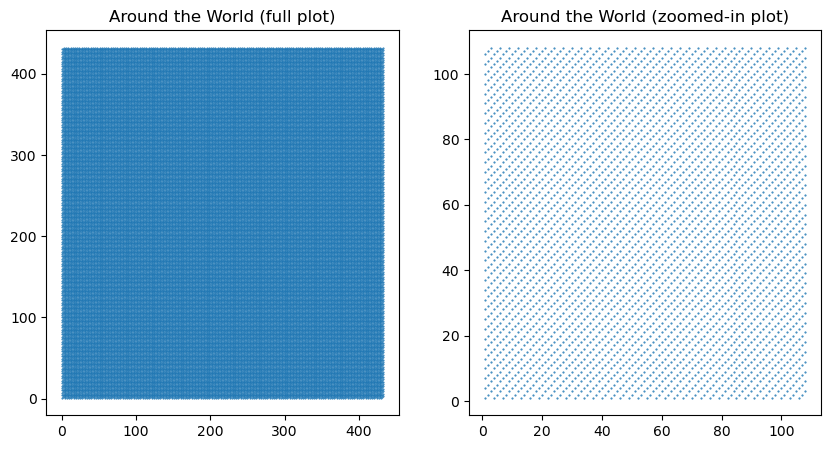

In [33]:
lyrics_series = track_info["Around the World"]["word_series"];

radius = .01;

zooms = [432, 108]
titles = ["Around the World (full plot)", "Around the World (zoomed-in plot)"]

fig, axs = subplots(1, 2, figsize=(10, 5));


for i in 1:length(zooms)
    zoom = zooms[i]
    title = titles[i]
    
    RP = RecurrenceMatrix(lyrics_series[1:zoom], radius);
    xs, ys = coordinates(RP);

    axs[i].scatter(xs, ys, s = 1, marker=".");
    axs[i].set_title(title)
end 





One thing that stands out is that even though the fundamental repeating unit of the song is just three words, the captured "sequences" are much longer. This is because the song repeats the phrase "Around the World" over and over again with no breaks. This is why the mean line length (L) is so high, each of the diagonals represents a single sequence ranging from a minimum of 3 (at the corners) to a maximum of 429 words (1 long sequence of "Around the World" repeated 143 times) right off of the line of incidence.

This is also why ENTR is so high. Each diagonal is a different, unique line length ranging from 3 to 429, making for a uniform distribution of line lengths. So if we were to take ENTR at face value, we would arrive at an inconsistent conclusion. We know that the complexity of the song is pretty low here, but due to the constraints of the measure, ENTR gives us a high score. This is why it's important to consider the context of the data when interpreting aRQA measures.

For context here, we might look at the two additional measures that are added to our summary table (and plot below), MRT and RTE. MRT refers to the Mean Recurrence Time, that is, on average how long does it take for a word to repeat itself. RTE is an entropy measure indicating the complexity of the recurrence times. In this case, for "Around the World", both measures are very low, indicating that the recurrence times are very short (2 words between repeats) and not very complex (it's always 2 words between repeats). In this case, RTE might be a better measure of the complexity of the song than ENTR.


## Moving Forward

In the `playlist.csv` there are a number of other songs. They include: "The Boxer" by Simon and Garfunkel, "In the Aeroplane Over the Sea" by Neutral Milk Hotel, "Crazy" by Gnarls Barkley among others. To get us started I'm going to add these to our list and see what measures we get. Given these measures, if you are familiar with these songs, what might you predict about their structure? If you're not, go have a listen (and try not to judge my musical tastes) and come back. I encourage you to explore them and see what you can learn.

In [83]:
song_data = CSV.read("../data/playlist_lyrics.csv", DataFrame);

In [86]:

all_track_info = DataFrame(artist=[], title=[], key = [], lyrics=[], genre=[], cleaned_lyrics=[], RR=[], DET=[], L = [], ENTR=[], MRT = [], RTE = [])

for row in eachrow(song_data)
    # get the artist name, original lyrics, and cleaned lyrics
    artist = row.artist
    song = row.title
    key = "$artist - $song"
    lyrics = row.lyrics
    genre = row.tag
    cleaned_lyrics = lyrics_cleaner(lyrics)
    
    # convert the cleaned lyrics to word numbers using the word_dict
    words = split(cleaned_lyrics)
    unique_words = unique(words)
    word_dict = Dict(unique_words .=> 1:length(unique_words))
    lyrics_series = [word_dict[word] for word in words]
    
    RP = RecurrenceMatrix(lyrics_series, radius);
    
    rqa_metrics = rqa(RP; lmin = 2, thieller = 0) 
    
    RR = rqa_metrics[:RR]
    DET = rqa_metrics[:DET]
    L = rqa_metrics[:L]
    ENTR = rqa_metrics[:ENTR]
    MRT = rqa_metrics[:MRT]
    RTE = rqa_metrics[:RTE]
    
    # create a new row for the DataFrame
    new_row = DataFrame(artist=artist, title=song, key = key, lyrics=lyrics, genre=genre, cleaned_lyrics=cleaned_lyrics, RR=RR, DET=DET, L=L, ENTR=ENTR, MRT = MRT, RTE = RTE)    
    # append the new row to the existing DataFrame
    all_track_info = vcat(all_track_info, new_row)
end

all_track_info = filter(row -> row.title != "Around the World", all_track_info);


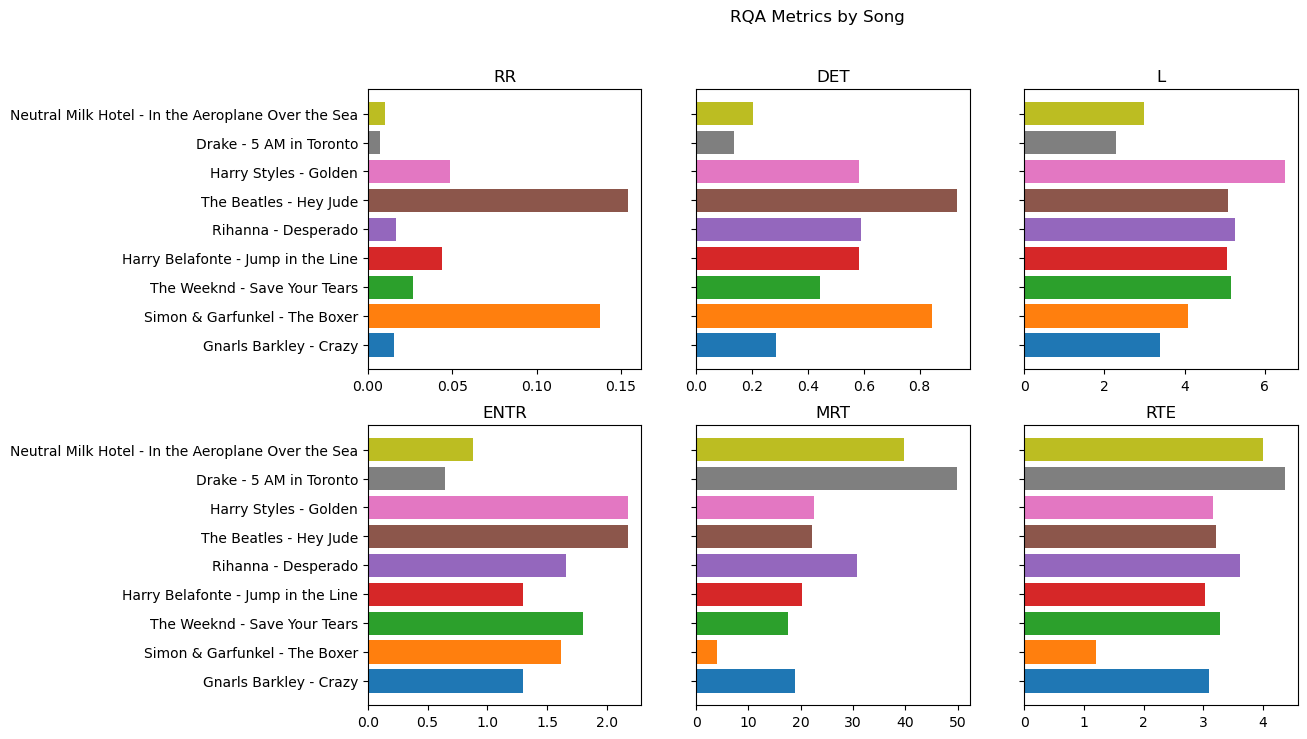

In [93]:
using PyPlot
using DataFrames

# assuming your DataFrame is called "playlist_rqa"
# create a figure with three subplots
fig, axs = subplots(2, 3, figsize=(12, 8), sharey=true);

# create a list of colors for each song
colors = ["C0", "C1", "C2", "C3", "C4", "C5", "C6", "C7", "C8", "C9"];

# plot the mean values for RR in the first subplot
axs[1].barh(all_track_info.key, all_track_info.RR, color=colors);
axs[1].set_title("RR");

# plot the mean values for DET in the second subplot
axs[3].barh(all_track_info.key, all_track_info.DET, color=colors);
axs[3].set_title("DET");
#axs[2].set_yticklabels([])

# plot the mean values for ENTR in the third subplot
axs[5].barh(all_track_info.key, all_track_info.L, color=colors);
axs[5].set_title("L");
#axs[3].set_yticklabels([])

# plot the mean values for ENTR in the third subplot
axs[2].barh(all_track_info.key, all_track_info.ENTR, color=colors);
axs[2].set_title("ENTR");
#axs[3].set_yticklabels([])

# plot the mean values for ENTR in the third subplot
axs[4].barh(all_track_info.key, all_track_info.MRT, color=colors);
axs[4].set_title("MRT");
#axs[3].set_yticklabels([])

# plot the mean values for ENTR in the third subplot
axs[6].barh(all_track_info.key, all_track_info.RTE, color=colors);
axs[6].set_title("RTE");
#axs[3].set_yticklabels([])

# set the plot title and axis labels
fig.suptitle("RQA Metrics by Song");
#fig.text(0.04, 0.5, "Value", va="center", rotation="vertical")

# display the plot
show()

## Conclusions

In this example, we've used song lyrics as a familiar gateway to build insights and intuitions about aRQA. The rhythmic patterns and recurring themes in music have allowed us to get a feel for the capabilities of recurrence analysis in an accessible manner. That said, you might easily build on this analysis, perhaps using aRQA measures as a basis for clustering songs into genres or artists for music recommendation. For aspiring songwriters or purveyors of music, understanding recurrent patterns in popular songs might provide insights into what makes a song catchy. Combined with other tools, aRQA could offer a deeper dive into the sentiment progression of a song, revealing how emotions ebb and flow throughout; and aRQA's analytical cousin, cross-recurrence quantification analysis (see you at letter C, maybe) has been used to identify cover songs and plagiarism.

Of course, the potential applications of this approach extend far beyond just lyrics. One can easily envision adapting this framework to a number of other use cases, from analyzing textual patterns in literature and historical documents to discerning behavioral trends in social networks, to predicting breakdowns in machines—including biological ones. The possibilities are endless.